In [12]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import nltk
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import plotly.express as px
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from sklearn.preprocessing import OrdinalEncoder

In [13]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [14]:
df['cyberbullying_type'].describe()

count        47692
unique           6
top       religion
freq          7998
Name: cyberbullying_type, dtype: object

In [15]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

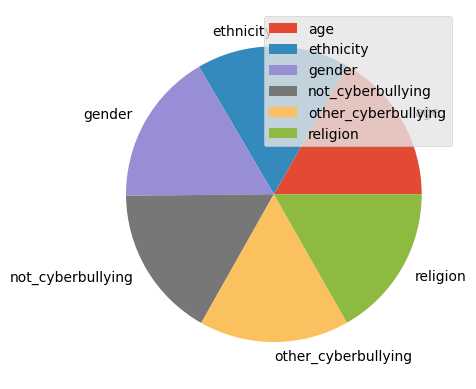

In [16]:
df.groupby('cyberbullying_type').size().plot(kind='pie')
plt.legend()

In [17]:
print('Number of Duplicates : ',df.duplicated().sum())

Number of Duplicates :  36


In [18]:
print('Shape before remove duplicates :',df.shape)
df=df.drop_duplicates()
print('Shape after  remove duplicates :',df.shape)

Shape before remove duplicates : (47692, 2)
Shape after  remove duplicates : (47656, 2)


In [19]:
import re
import string
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
ps=PorterStemmer()
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
class tweets_prepocessing_df:
    def __init__(self,text):
        text = text.to_frame()
        self.text = text['tweet_text']
    
    def remove_emoji(self,text):
        emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_url(self,text):
        text = re.sub(r"(?:\@|https?\://)\S+", " ", text)
        text = re.sub(r'[^\x00-\x7f]',r'', text)
        banned_list = string.punctuation
        text = text.translate(str.maketrans(' ',' ',banned_list))
        return text

    def remove_mult_spaces(self,text):
        return re.sub("\s\s+" , " ", text)
    
    def remove_stopwords(self,text):
        clean_text = []
        for el in word_tokenize(text):
            if not el in stop_words:
                clean_text.append(el)
        return clean_text

    def decontract(self,text):
        text = text.replace('\r',' ').replace('\n',' ').lower()
        text = re.sub(r"won\'t", " will not", text)
        text = re.sub(r"won\'t've", " will not have", text)
        text = re.sub(r"can\'t", " can not", text)
        text = re.sub(r"don\'t", " do not", text)
        text = re.sub(r"can\'t've", " can not have", text)
        text = re.sub(r"ma\'am", " madam", text)
        text = re.sub(r"let\'s", " let us", text)
        text = re.sub(r"ain\'t", " am not", text)
        text = re.sub(r"shan\'t", " shall not", text)
        text = re.sub(r"sha\n't", " shall not", text)
        text = re.sub(r"o\'clock", " of the clock", text)
        text = re.sub(r"y\'all", " you all", text)

        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"n\'t've", " not have", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'d've", " would have", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'ll've", " will have", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        text = re.sub(r"\'re", " are", text)
        return text

    def filter_chars(self,text):
        sent = []
        for word in text.split(' '):
            if ('$' in word) | ('&' in word):
                sent.append('')
            else:
                sent.append(word)
        return ' '.join(sent)
    
    def clean_hashtags(self,text):
        text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
        text = " ".join(word.strip() for word in re.split('#|_', text)) #remove hashtags symbol from words in the middle of the sentence
        return text

    def lemmatize(self,text):
        lemmatize_words = []
        for words in text:
            lemmatize_words.append(lem.lemmatize(words))
            # lemmatize_words.append(ps.stem(words))
        return lemmatize_words
    
    def clean_data(self):
       self.text = self.text.apply(self.decontract)
       self.text = self.text.apply(self.remove_emoji)
       self.text = self.text.apply(self.remove_url)
       self.text = self.text.apply(self.clean_hashtags)
       self.text = self.text.apply(self.filter_chars)
       self.text = self.text.apply(self.remove_mult_spaces)
       self.text = self.text.apply(self.remove_stopwords)
       self.text = self.text.apply(self.lemmatize)
       return self.text
    

**Removing the punctuations if present**

In [21]:
def remove_punct(text):
  #print(text)
  return text.translate(str.maketrans('', '',string.punctuation))

df['no_punctuation'] = df['tweet_text'].apply(remove_punct)
df['no_punctuation']

0        In other words katandandre your food was crapi...
1        Why is aussietv so white MKR theblock ImACeleb...
2        XochitlSuckkks a classy whore Or more red velv...
3        JasonGio meh P  thanks for the heads up but no...
4        RudhoeEnglish This is an ISIS account pretendi...
                               ...                        
47687    Black ppl arent expected to do anything depend...
47688    Turner did not withhold his disappointment Tur...
47689    I swear to God This dumb nigger bitch I have g...
47690    Yea fuck you RT therealexel IF YOURE A NIGGER ...
47691    Bro U gotta chill RT CHILLShrammy Dog FUCK KP ...
Name: no_punctuation, Length: 47656, dtype: object

**Converting the uppercase to lowercase and removing punctuations**

In [22]:
nltk.download('stopwords')
def lower(text):
    return text.lower()
df['no_punctuation'] = df['no_punctuation'].apply(lower)
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = []
    for el in word_tokenize(text):
        if not el in stop_words:
            new_text.append(el)
    return new_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
nltk.download('stopwords')
def lower(text):
    return text.lower()
df['no_punctuation'] = df['no_punctuation'].apply(lower)
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = []
    for el in word_tokenize(text):
        if not el in stop_words:
            new_text.append(el)
    return new_text
df['no_stopwords'] = df.no_punctuation.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing the emojis and converting it into words**

In [24]:
def smile_handle(word_list):
  new_word_list = []
  emoji_pattern = re.compile(r"([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])", flags=re.UNICODE)
  for word in word_list:
    if len(re.findall(emoji_pattern,word))!=0:
      if len(re.findall(emoji_pattern,word))!=len(word):
        new_word_list.append(re.sub(emoji_pattern,'',word))
      new_word_list.extend(re.findall(emoji_pattern,word))
      #print(word,new_word_list)
    else:
      new_word_list.append(word)
  for i,el in enumerate(new_word_list):
    if type(el)==tuple:
      new_word_list[i] = el[1]
  return new_word_list
df.no_stopwords = df.no_stopwords.apply(smile_handle)

**Removing the punctuations and converting the upper case to lower case**

In [25]:
df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head()

C:\Users\chitr\AppData\Local\Temp\ipykernel_10328\1447350602.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,tweet_text,cyberbullying_type,no_punctuation,no_stopwords
0,in other words katandandre your food was crapi...,not_cyberbullying,in other words katandandre your food was crapi...,"[words, katandandre, food, crapilicious, mkr]"
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying,why is aussietv so white mkr theblock imaceleb...,"[aussietv, white, mkr, theblock, imacelebritya..."
2,xochitlsuckkks a classy whore or more red vel...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, classy, whore, red, velvet, c..."
3,jason_gio meh p thanks for the heads up but n...,not_cyberbullying,jasongio meh p thanks for the heads up but no...,"[jasongio, meh, p, thanks, heads, concerned, a..."
4,rudhoeenglish this is an isis account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, isis, account, pretending, kur..."


In [26]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

**Tokenizing words to explore more data**

In [27]:
import nltk
nltk.download('punkt')

def length(text):
    return len(word_tokenize(text))
df['word_count'] = df['tweet_text'].apply(length)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Histogram to know the variation of the graphical (EDA)analysis**

In [28]:
fig = px.histogram(df, x="word_count", color="cyberbullying_type", title="Words in the tweet (including very long tweets)")
fig.show()
px.histogram(df[df.word_count<900], x="word_count", color="cyberbullying_type", title="Words in the tweet (excluding very long tweets)")

In [29]:
text = 'In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying'
twp = tweets_prepocessing_df(df['tweet_text'])
df.tweet_text

0        in other words katandandre your food was crapi...
1        why is aussietv so white mkr theblock imaceleb...
2         xochitlsuckkks a classy whore or more red vel...
3         jason_gio meh p thanks for the heads up but n...
4         rudhoeenglish this is an isis account pretend...
                               ...                        
47687    black ppl aren t expected to do anything depen...
47688    turner did not withhold his disappointment tur...
47689    i swear to god this dumb nigger bitch i have g...
47690    yea fuck you rt therealexel if youre a nigger ...
47691    bro u gotta chill rt chillshrammy dog fuck kp ...
Name: tweet_text, Length: 47656, dtype: object

In [30]:
df['clean_tweets'] = twp.clean_data()

In [31]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

Gender


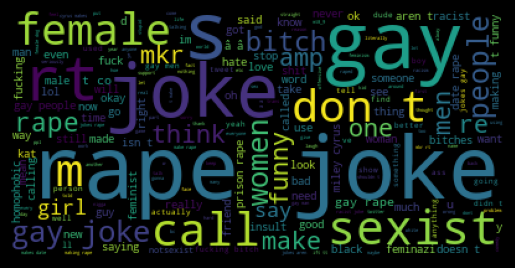

Ethnicity


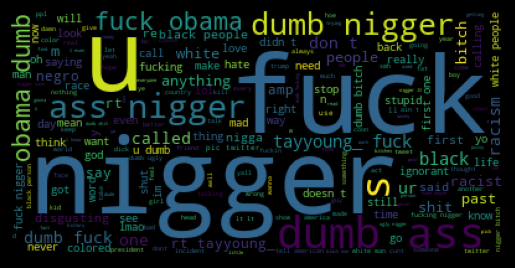

Religion


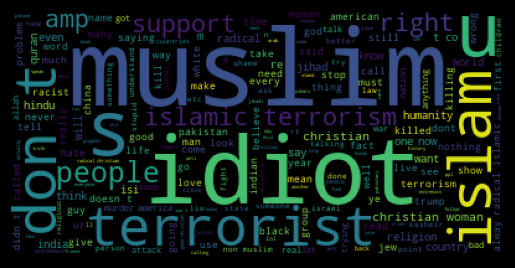

Age


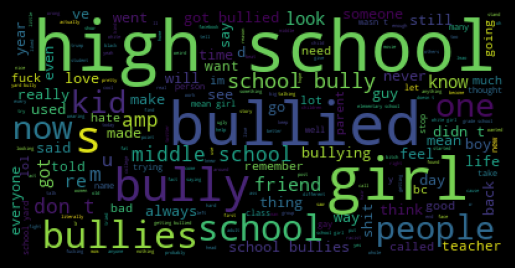

Other cyberbullying


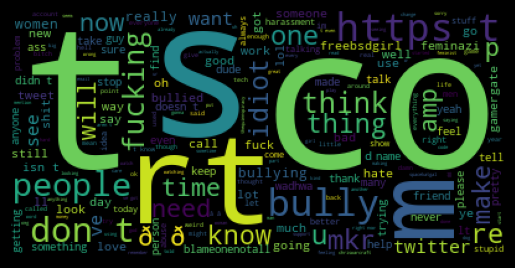

Non-bullying


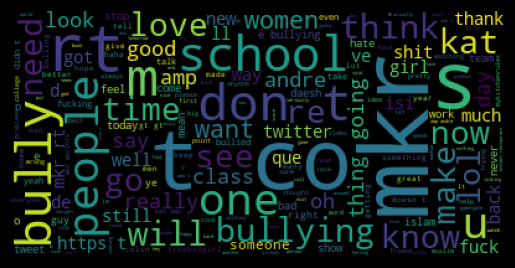

In [32]:

plt.figure(facecolor='black')
print("Gender")
text = " ".join(review for review in df[df.cyberbullying_type=='gender'].tweet_text.astype(str))
wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Ethnicity")
text = " ".join(review for review in df[df.cyberbullying_type=='ethnicity'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Religion")
text = " ".join(review for review in df[df.cyberbullying_type=='religion'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Age")
text = " ".join(review for review in df[df.cyberbullying_type=='age'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Other cyberbullying")
text = " ".join(review for review in df[df.cyberbullying_type=='other_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Non-bullying")
text = " ".join(review for review in df[df.cyberbullying_type=='not_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [34]:
# df = df[df.cyberbullying_type!='other_cyberbullying']

In [35]:
# filtered_df = df[(df['cyberbullying_type'] == 'other_cyberbullying') | (df['cyberbullying_type'] == 'non-bullying')]

# # Displaying the filtered DataFrame
# print(filtered_df)

In [36]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [37]:
from collections import Counter
vocab = Counter()

In [38]:
def add_to_vocab(words):
    global vocab
    vocab.update(words)

In [39]:

df['clean_tweets'].apply(add_to_vocab)
vocab_size = len(vocab)
print('Vocabulary size',vocab_size)

Vocabulary size 56083


In [40]:
vocab.most_common(50)

[('school', 9299),
 ('fuck', 6164),
 ('like', 6032),
 ('nigger', 5796),
 ('joke', 5638),
 ('girl', 5612),
 ('u', 5602),
 ('bully', 5440),
 ('dumb', 5390),
 ('high', 5268),
 ('muslim', 5005),
 ('people', 4944),
 ('bullied', 4703),
 ('gay', 4611),
 ('http', 4609),
 ('rape', 4529),
 ('rt', 4349),
 ('one', 3799),
 ('idiot', 3524),
 ('co', 3313),
 ('woman', 3299),
 ('get', 3137),
 ('amp', 2972),
 ('black', 2936),
 ('as', 2825),
 ('bitch', 2572),
 ('know', 2558),
 ('mkr', 2530),
 ('white', 2374),
 ('think', 2336),
 ('make', 2299),
 ('right', 2290),
 ('say', 2250),
 ('christian', 2232),
 ('would', 2145),
 ('call', 1934),
 ('go', 1913),
 ('got', 1880),
 ('time', 1835),
 ('fucking', 1684),
 ('even', 1667),
 ('want', 1646),
 ('see', 1571),
 ('shit', 1553),
 ('never', 1543),
 ('thing', 1540),
 ('called', 1530),
 ('ur', 1528),
 ('terrorist', 1525),
 ('still', 1455)]

In [41]:
words = [key for key,val in vocab.items() if val>=3]
vocab_size = len(words)
print(vocab_size)
words

14691


['word',
 'katandandre',
 'food',
 'mkr',
 'white',
 'imacelebrityau',
 'today',
 'neighbour',
 'etc',
 'classy',
 'whore',
 'red',
 'velvet',
 'cupcake',
 'jasongio',
 'meh',
 'p',
 'thanks',
 'head',
 'concerned',
 'another',
 'angry',
 'dude',
 'twitter',
 'rudhoeenglish',
 'isi',
 'account',
 'pretending',
 'kurdish',
 'like',
 'islam',
 'lie',
 'raja5aab',
 'quickieleaks',
 'yes',
 'test',
 'god',
 'good',
 'bad',
 'indifferent',
 'weird',
 'whatever',
 'prof',
 'existence',
 'itu',
 'sekolah',
 'ya',
 'bukan',
 'bully',
 'ga',
 'kaya',
 'karma',
 'hope',
 'bite',
 'kat',
 'butt',
 'nasty',
 'stockputout',
 'everything',
 'mostly',
 'priest',
 'rebecca',
 'black',
 'drop',
 'school',
 'due',
 'bullying',
 'jordisdead',
 'http',
 'co',
 'flush',
 'com',
 'ughhhh',
 'rt',
 'turkish',
 'state',
 'killed',
 'child',
 'last',
 '11',
 'year',
 'news',
 'love',
 'best',
 'response',
 'hotcake',
 'managed',
 'film',
 'non',
 'de',
 'fazer',
 'comigo',
 'mim',
 'sofrendo',
 'bulling',
 'vi

In [42]:
def remove_rare(text):
    global words
    for el in text:
        if not el in words:
            text.remove(el)
    return text

df.loc[:, 'clean_tweets'] = df['clean_tweets'].apply(remove_rare)

In [43]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

# CNN Model

In [44]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [45]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
enc = OrdinalEncoder()


In [46]:
df

,tweet_text,cyberbullying_type,no_punctuation,no_stopwords,word_count,clean_tweets
0,in other words katandandre your food was crapi...,not_cyberbullying,in other words katandandre your food was crapi...,"[words, katandandre, food, crapilicious, mkr]",9,"[word, katandandre, food, mkr]"
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying,why is aussietv so white mkr theblock imaceleb...,"[aussietv, white, mkr, theblock, imacelebritya...",14,"[white, mkr, imacelebrityau, today, studio10, ..."
2,xochitlsuckkks a classy whore or more red vel...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, classy, whore, red, velvet, c...",9,"[classy, whore, red, velvet, cupcake]"
3,jason_gio meh p thanks for the heads up but n...,not_cyberbullying,jasongio meh p thanks for the heads up but no...,"[jasongio, meh, p, thanks, heads, concerned, a...",18,"[jasongio, meh, p, thanks, head, concerned, an..."
4,rudhoeenglish this is an isis account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, isis, account, pretending, kur...",18,"[rudhoeenglish, isi, account, pretending, kurd..."
...,...,...,...,...,...,...
47687,black ppl aren t expected to do anything depen...,ethnicity,black ppl arent expected to do anything depend...,"[black, ppl, arent, expected, anything, depend...",43,"[black, ppl, expected, anything, anything, yet..."
47688,turner did not withhold his disappointment tur...,ethnicity,turner did not withhold his disappointment tur...,"[turner, withhold, disappointment, turner, cal...",45,"[turner, withhold, disappointment, turner, cal..."
47689,i swear to god this dumb nigger bitch i have g...,ethnicity,i swear to god this dumb nigger bitch i have g...,"[swear, god, dumb, nigger, bitch, got, bleach,...",21,"[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,yea fuck you rt therealexel if youre a nigger ...,ethnicity,yea fuck you rt therealexel if youre a nigger ...,"[yea, fuck, rt, therealexel, youre, nigger, fu...",15,"[yea, fuck, rt, youre, nigger, fucking, unfoll..."


In [47]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df[['tweet_text','clean_tweets']],df['cyberbullying_type'],random_state=0,test_size=.3)

In [49]:
X_actual_test = X_test
y_actual_test = y_test

In [50]:
X_train_os,y_train_os = ros.fit_resample(np.array(X_train['clean_tweets']).reshape(-1,1),np.array(y_train).reshape(-1,1))
train_os = pd.DataFrame(list(zip([x[0] for x in X_train_os], y_train_os)), columns = ['lemmatized','cyberbullying_type']);

In [51]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [52]:
X_train_os = train_os['lemmatized']
y_train_os = train_os['cyberbullying_type']
X_train_os = X_train_os.to_frame()
y_train_os = y_train_os.to_frame()

In [53]:
X_test['clean_tweets']

21010    [idiot, muslim, person, faith, indian, person,...
7360                     [colin, good, form, tonight, mkr]
33768    [school, sad, one, bullied, always, one, getti...
13535           [read, killerblondes, get, switching, mkr]
25175     [eye, gon, na, hurt, fucking, bad, tmr, morning]
                               ...                        
1676         [eat, pizza, pizza, bread, stick, amp, salad]
38756    [consolation, good, chance, high, school, bull...
21323    [story, 1, radical, islamic, terrorism, amp, j...
2413                         [go, two, boring, class, day]
13096    [bro, female, dating, ugly, ahh, nigga, call, ...
Name: clean_tweets, Length: 14297, dtype: object

In [54]:
vocab = Counter()
def add_to_vocab(words):
  global vocab
  vocab.update(words)
X_train_os['lemmatized'].apply(add_to_vocab)
df['clean_tweets'].apply(add_to_vocab)
vocab_size = len(vocab)
vocab_size

19963

In [55]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_os['lemmatized'])
X_train_os = tokenizer.texts_to_sequences(X_train_os['lemmatized'])
X_test = tokenizer.texts_to_sequences(X_test['clean_tweets'])

In [56]:
max_size = len(max(df['clean_tweets'],key=lambda x:len(x)))
max_size

424

In [57]:
X_train_os = pad_sequences(X_train_os,maxlen=max_size,padding='post')
X_test = pad_sequences(X_test,maxlen=max_size,padding='post')

In [58]:
enc = OrdinalEncoder()
y_train_os,y_test = to_categorical(enc.fit_transform(X=y_train_os['cyberbullying_type'].to_frame()),num_classes=6),to_categorical(enc.fit_transform(X=y_test.to_frame()),num_classes=6)


In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D

In [60]:
def define_model(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [61]:
model_1 = define_model(vocab_size,max_size)
model_1.fit(X_train_os,y_train_os,epochs=20,verbose=2)


Epoch 1/20


1055/1055 - 65s - loss: 0.6230 - accuracy: 0.7305 - 65s/epoch - 62ms/step
Epoch 2/20
1055/1055 - 59s - loss: 0.3503 - accuracy: 0.8598 - 59s/epoch - 56ms/step
Epoch 3/20
1055/1055 - 58s - loss: 0.2605 - accuracy: 0.8990 - 58s/epoch - 55ms/step
Epoch 4/20
1055/1055 - 65s - loss: 0.2002 - accuracy: 0.9212 - 65s/epoch - 62ms/step
Epoch 5/20
1055/1055 - 66s - loss: 0.1600 - accuracy: 0.9348 - 66s/epoch - 62ms/step
Epoch 6/20
1055/1055 - 64s - loss: 0.1334 - accuracy: 0.9445 - 64s/epoch - 61ms/step
Epoch 7/20
1055/1055 - 60s - loss: 0.1120 - accuracy: 0.9499 - 60s/epoch - 57ms/step
Epoch 8/20
1055/1055 - 67s - loss: 0.1002 - accuracy: 0.9540 - 67s/epoch - 63ms/step
Epoch 9/20
1055/1055 - 70s - loss: 0.0903 - accuracy: 0.9562 - 70s/epoch - 66ms/step
Epoch 10/20
1055/1055 - 58s - loss: 0.0886 - accuracy: 0.9581 - 58s/epoch - 55ms/step
Epoch 11/20
1055/1055 - 67s - loss: 0.0799 - accuracy: 0.9596 - 67s/epoch - 63ms/step
Epoch 12/20
1055/1055 - 69s - loss: 0.0748 - accuracy: 0.960

In [62]:
results_os = model_1.evaluate(X_test, y_test)
results_os

447/447 [==============================] - 8s 14ms/step - loss: 1.4517 - accuracy: 0.7965


[1.4517385959625244, 0.7965307235717773]

In [63]:
y_pred_model_1 = model_1.predict(X_test)
y_pred_model_1 =  np.argmax(y_pred_model_1, axis = 1)

result_model_1_df = pd.DataFrame({'Test text':X_actual_test['tweet_text'],'actual cyberbullying type':y_actual_test,'predicted cyberbullying type':y_pred_model_1})
cyberbullying_types = {0:'age',1:'ethnicity',2:'gender',3:"not_cyberbullying",4:'religion' }
result_model_1_df['predicted cyberbullying type'] = result_model_1_df['predicted cyberbullying type'].replace(cyberbullying_types)

447/447 [==============================] - 7s 14ms/step


In [64]:
verify_model_1 = result_model_1_df[result_model_1_df['actual cyberbullying type'] != result_model_1_df['predicted cyberbullying type']]
# verify_model_2 = result_model_2_df[result_model_2_df['actual cyberbullying type'] != result_model_2_df['predicted cyberbullying type']]

In [65]:
print('Number of Tweets that are correctly predicted by model 1 : ',result_model_1_df.shape[0]-verify_model_1.shape[0])
print('Number of Tweets that are wrongly predicted by model 1   : ',verify_model_1.shape[0])
print('------------------------------------------------------------------')
print('Total Number of tweets                                   : ',result_model_1_df.shape[0])

Number of Tweets that are correctly predicted by model 1 :  7957
Number of Tweets that are wrongly predicted by model 1   :  6340
------------------------------------------------------------------
Total Number of tweets                                   :  14297


In [66]:
def define_model_2(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [67]:
model_2 = define_model_2(vocab_size,max_size)
model_2.fit(X_train_os,y_train_os,epochs=20,verbose=2)

Epoch 1/20
1055/1055 - 78s - loss: 0.7296 - accuracy: 0.6830 - 78s/epoch - 74ms/step
Epoch 2/20
1055/1055 - 86s - loss: 0.3779 - accuracy: 0.8435 - 86s/epoch - 82ms/step
Epoch 3/20
1055/1055 - 79s - loss: 0.2934 - accuracy: 0.8894 - 79s/epoch - 75ms/step
Epoch 4/20
1055/1055 - 138s - loss: 0.2287 - accuracy: 0.9151 - 138s/epoch - 131ms/step
Epoch 5/20
1055/1055 - 57s - loss: 0.1898 - accuracy: 0.9299 - 57s/epoch - 54ms/step
Epoch 6/20
1055/1055 - 56s - loss: 0.1584 - accuracy: 0.9387 - 56s/epoch - 53ms/step
Epoch 7/20
1055/1055 - 55s - loss: 0.1411 - accuracy: 0.9448 - 55s/epoch - 52ms/step
Epoch 8/20
1055/1055 - 57s - loss: 0.1275 - accuracy: 0.9466 - 57s/epoch - 54ms/step
Epoch 9/20
1055/1055 - 56s - loss: 0.1183 - accuracy: 0.9489 - 56s/epoch - 53ms/step
Epoch 10/20
1055/1055 - 56s - loss: 0.1062 - accuracy: 0.9520 - 56s/epoch - 53ms/step
Epoch 11/20
1055/1055 - 55s - loss: 0.1043 - accuracy: 0.9528 - 55s/epoch - 52ms/step
Epoch 12/20
1055/1055 - 55s - loss: 0.0926 - accuracy: 0.956

In [68]:
results_2 = model_2.evaluate(X_test, y_test)
results_2

447/447 [==============================] - 5s 10ms/step - loss: 1.2623 - accuracy: 0.8010


[1.2622570991516113, 0.8010072112083435]

In [69]:
def define_model_3(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [70]:
model_3 = define_model_3(vocab_size,max_size)
model_3.fit(X_train_os,y_train_os,epochs=35,verbose=2)

Epoch 1/35
1055/1055 - 66s - loss: 0.9437 - accuracy: 0.5938 - 66s/epoch - 62ms/step
Epoch 2/35
1055/1055 - 63s - loss: 0.4498 - accuracy: 0.8095 - 63s/epoch - 60ms/step
Epoch 3/35
1055/1055 - 61s - loss: 0.3498 - accuracy: 0.8589 - 61s/epoch - 58ms/step
Epoch 4/35
1055/1055 - 57s - loss: 0.2834 - accuracy: 0.8917 - 57s/epoch - 54ms/step
Epoch 5/35
1055/1055 - 55s - loss: 0.2342 - accuracy: 0.9119 - 55s/epoch - 52ms/step
Epoch 6/35
1055/1055 - 55s - loss: 0.2025 - accuracy: 0.9260 - 55s/epoch - 52ms/step
Epoch 7/35
1055/1055 - 55s - loss: 0.1787 - accuracy: 0.9357 - 55s/epoch - 52ms/step
Epoch 8/35
1055/1055 - 52s - loss: 0.1572 - accuracy: 0.9397 - 52s/epoch - 49ms/step
Epoch 9/35
1055/1055 - 48s - loss: 0.1443 - accuracy: 0.9437 - 48s/epoch - 46ms/step
Epoch 10/35
1055/1055 - 48s - loss: 0.1379 - accuracy: 0.9455 - 48s/epoch - 46ms/step
Epoch 11/35
1055/1055 - 49s - loss: 0.1230 - accuracy: 0.9505 - 49s/epoch - 46ms/step
Epoch 12/35
1055/1055 - 49s - loss: 0.1119 - accuracy: 0.9521 -

In [72]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [73]:
y_pred_model_3 = model_3.predict(X_test)
y_pred_model_3_srg =  np.argmax(y_pred_model_3, axis = 1)

result_model_3_df = pd.DataFrame({'Test text':X_actual_test['tweet_text'],'actual cyberbullying type':y_actual_test,'predicted cyberbullying type':y_pred_model_3_srg})
cyberbullying_types = {0:'age',1:'ethnicity',2:'gender',3:"not_cyberbullying",4:'religion' , 5:'other_cyerbullying' }
result_model_3_df['predicted cyberbullying type'] = result_model_3_df['predicted cyberbullying type'].replace(cyberbullying_types)

447/447 [==============================] - 4s 8ms/step


In [74]:
from keras.models import save_model
save_model(model_3, 'cyber_bullying_model_3_new(90.7029%).h5')

C:\Users\chitr\AppData\Local\Temp\ipykernel_10328\1534239523.py:2: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [90]:
from tensorflow.keras.models import load_model

loaded_saved_model = load_model('cyber_bullying_model_3_new(90.7029%).h5')

In [91]:
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 424, 100)          1996300   
                                                                 
 conv1d_3 (Conv1D)           (None, 417, 32)           25632     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 208, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 201, 64)           16448     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 100, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 93, 128)          

In [92]:
import tensorflow as tf
tf.keras.utils.plot_model(
    loaded_saved_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [93]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

saved_model = load_model('cyber_bullying_model_3_new(90.7029%).h5')
saved_model

In [94]:
X_train_os = pd.DataFrame(X_train_os)
X_train_os

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
0,9,4,2,3864,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,193,422,444,31,320,16,6,15,2348,14,...,0,0,0,0,0,0,0,0,0,0
2,98,129,7,1,80,13869,364,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,601,139,1388,1421,1800,6150,314,32,2410,436,...,0,0,0,0,0,0,0,0,0,0
4,381,6886,846,457,2055,3865,11,846,310,891,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,8814,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33740,3092,1409,1752,2333,3138,14,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33741,58,13,13,276,3240,195,32,711,0,0,...,0,0,0,0,0,0,0,0,0,0
33742,765,7,549,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_test_reshaped = X_test[:, :190]

In [96]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=100, input_length=424))
model.add(Conv1D(32, 8, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 8, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 8, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
y_pred_saved = saved_model.predict(X_test)
y_pred = np.argmax(y_pred_saved, axis = 1)


447/447 [==============================] - 6s 13ms/step


In [98]:
y_pred_type=[]

for var in y_pred:
    if(var == 0):
        y_pred_type.append('age')
    if(var == 1):
        y_pred_type.append('ethnicity')
    if(var == 2):
        y_pred_type.append('gender')
    if(var == 3):
        y_pred_type.append('not_cyberbullying')
    if(var == 4):
        y_pred_type.append('religion')
    if (var == 5):
        y_pred_type.append('other_cyberbullying')

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

def conf_matrix(y, y_pred, title, labels):
    fig, ax = plt.subplots(figsize=(6.5,5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels) 
    ax.yaxis.set_ticklabels(labels)
    ax.set_ylabel('Test', fontsize=15)
    ax.set_xlabel('Predicted', fontsize=15)
    plt.show()  

In [100]:

print(classification_report(y_actual_test,y_pred_type))

                     precision    recall  f1-score   support

                age       0.98      0.94      0.95      2425
          ethnicity       0.99      0.93      0.96      2406
             gender       0.88      0.84      0.86      2400
  not_cyberbullying       0.47      0.51      0.49      2394
other_cyberbullying       0.00      0.00      0.00      2299
           religion       0.01      0.01      0.01      2373

           accuracy                           0.54     14297
          macro avg       0.55      0.54      0.55     14297
       weighted avg       0.56      0.54      0.55     14297



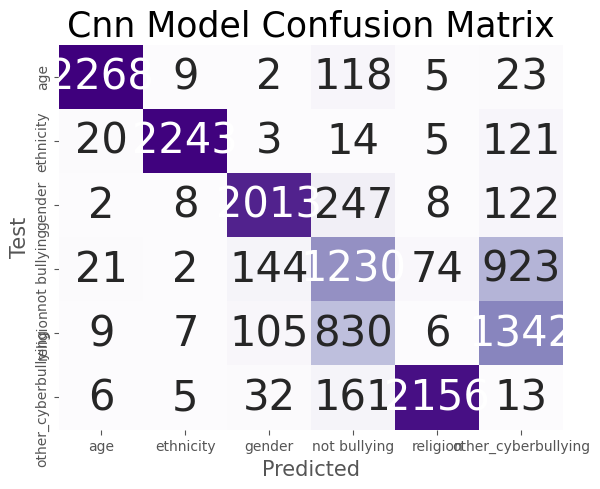

In [101]:
sentiments = ["age","ethnicity","gender","not bullying","religion","other_cyberbullying"]
conf_matrix(y_actual_test,y_pred_type,"Cnn Model Confusion Matrix",sentiments)

In [102]:
def predict_cyberbullying_type(new_text, model, tokenizer):
    # Preprocess the new text
    tokenized_text = tokenizer.texts_to_sequences([new_text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_size, padding='post')

    # Use the model to make predictions
    predictions = model.predict(padded_text)

    # Get the index with the highest probability
    predicted_index = np.argmax(predictions)

    # Map the index to the cyberbullying type
    cyberbullying_types = {0: 'age', 1: 'ethnicity', 2: 'gender', 3: 'not_cyberbullying', 4: 'religion', 5:'other_cyberbullying'}
    predicted_type = cyberbullying_types[predicted_index]

    return predicted_type


In [103]:
y_pred_model_3 = model_3.predict(X_test)
y_pred_model_3 =  np.argmax(y_pred_model_3, axis = 1)
result_model_3_df = pd.DataFrame({'Test text':X_actual_test['tweet_text'],'actual cyberbullying type':y_actual_test,'predicted cyberbullying type':y_pred_model_3})
cyberbullying_types = {0:'age',1:'ethnicity',2:'gender',3:"not_cyberbullying",4:'religion', 5:'other_cyberbullying' }
result_model_3_df['predicted cyberbullying type'] = result_model_3_df['predicted cyberbullying type'].replace(cyberbullying_types)

447/447 [==============================] - 6s 12ms/step


In [115]:
new_text = "Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future."
predicted_type = predict_cyberbullying_type(new_text, model_3, tokenizer)
print(f"Predicted Cyberbullying Type: {predicted_type}")

1/1 [==============================] - 0s 66ms/step
Predicted Cyberbullying Type: ethnicity
